# U2.1 Discriminant functions

# Index

1. Discriminant functions
2. Linear discriminant functions
3. Decision boundaries
4. Decision regions
5. Equivalent classifiers

# 1 Discriminant functions

**Notation:**
* **Objects (inputs):** $\;\boldsymbol{x}\in\mathcal{X},\,$ typically vectors of $D$ real features, $\,\mathcal{X}=\mathbb{ R}^D,\,D\geq 1$
* **Class labels (outputs):** $\;y\in\mathcal{Y}\,$ or $\,c\in\mathcal{C},\,$ typically $\,\mathcal{Y }=\mathcal{C}=\{1,\dotsc,C\},\,C\geq 2$

**Classical representation of classifiers:** $\;$ with a **discriminant function** per class, $\,g_c(x),\,$ to measure the (pseudo-)probability of $x$ belonging to $c $
$$c(\boldsymbol{x}) = \operatorname*{argmax}\limits_c\; g_c(\boldsymbol{x})$$

**Example:** $\;$ classifier in 3 classes for $\,\boldsymbol{x}=(x_1,x_2)^t\in [0,1]^2$
$$\begin{array}{cccccc}x_1&x_2&
g_1(\boldsymbol{x})&g_2(\boldsymbol{x})&g_3(\boldsymbol{x})&c(\boldsymbol{x})\\\hline
0 & 0 & 1.0 & 0.0 & 0.0 & 1\\
0 & 1 & \tfrac{1}{3} & \tfrac{1}{3} & \tfrac{1}{3} & 1\\
1 & 0 & 0.25 & 0.5 & 0.25 & 2\\
1 & 1 & 0.01 & 0.01 & 0.98 & 3\\\hline
\end{array}$$

**Bayes decision rule:** $\;$ with $\;g_c(\boldsymbol{x}) = P(c\mid\boldsymbol{x})\;$ or $\;g_c(\boldsymbol{ x}) = P(c)\,p(\boldsymbol{x}\mid c)$

# 2 Linear discriminant functions

**Linear discriminant function:** $\;$ linear function with the features
$$g_c(\boldsymbol{x})=\sum_d w_{cd}\,x_d + w_{c0} = \boldsymbol{w}_c^t\,\boldsymbol{x} + w_{c0}$$
* $\boldsymbol{w}_c=(w_{c1},w_{c2},\dotsc,w_{cD})^t$ is the **vector of weights** of class $c$
* $w_{c0}$ is the **threshold weight** of class $c$

**Example:** $\;C=2,\, x\in\mathbb{R},\, g_1(x)=4x-4,\, g_2(x)=12x-36$

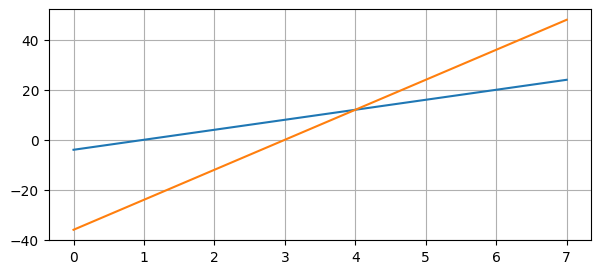

In [1]:
import numpy as np; import matplotlib.pyplot as plt
g1 = lambda x: 4*x-4; g2 = lambda x: 12*x-36; x = np.linspace(0, 7, 2)
plt.figure(figsize=(7, 3)); plt.grid(); plt.plot(x, g1(x), x, g2(x));

# 3 Decision boundaries
       
**Decision boundary between classes:** $\;$ geometric location where the discriminants of two (or more) classes are equal to each other
$$g_c(\boldsymbol{x}) = g_{c'}(\boldsymbol{x}) \qquad \text{with} ~~c\neq c'$$

**Example (cont.):** $\displaystyle\; g_1(x) = g_2(x) \rightarrow 4x-4 = 12x-36 \rightarrow x = \frac{32}{8}=4$

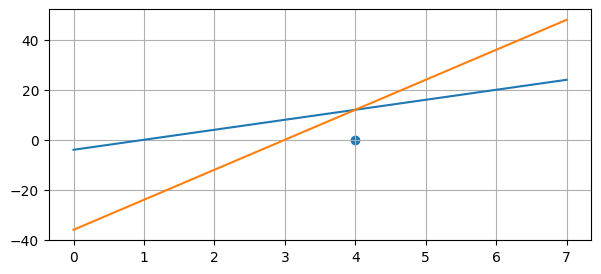

In [2]:
import numpy as np; import matplotlib.pyplot as plt
g1 = lambda x: 4*x-4; g2 = lambda x: 12*x-36; x = np.linspace(0, 7, 2)
plt.figure(figsize=(7, 3)); plt.grid(); plt.plot(x, g1(x), x, g2(x)); plt.scatter(4, 0);

**Linear boundaries:** $\;$ linear discriminants originate linear boundaries of dimension $D-1$
* One point, if $\;\mathcal{X}=\mathbb{R}$
* A line (straight lines), if $\;\mathcal{X}=\mathbb{R}^2$
* A surface (planes), if $\;\mathcal{X}=\mathbb{R}^3$

**Boundaries in general:** $\;$ **hypersurfaces** defined by the equations
$$g_c(\boldsymbol{x})-g_{c'}(\boldsymbol{x})=0\qquad \text{with} ~~c\neq c'$$

# 4 Decision regions

**Decision region of a class:** $\;$ Geometric locations where the discriminant of the class wins over the rest
$$R_c=\bigl\{\boldsymbol{x}\in\mathcal{X}:~~ g_c(\boldsymbol{x})>\max_{c'\neq c} \; g_{c'}(\boldsymbol{x})\bigr\}$$

**Example (cont.):** $\displaystyle\; R_1=\{x:g_1(x)>g_2(x)\}=(-\infty,4)\quad R_2=\{x:g_2(x)>g_1(x)\}=(4,\infty )$

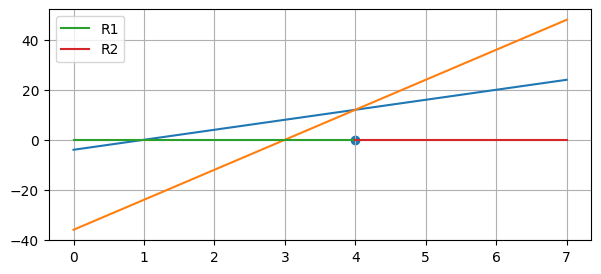

In [3]:
import numpy as np; import matplotlib.pyplot as plt
g1 = lambda x: 4*x-4; g2 = lambda x: 12*x-36; x = np.linspace(0, 7, 2)
plt.figure(figsize=(7, 3)); plt.grid(); plt.plot(x, g1(x), x, g2(x)); plt.scatter(4, 0)
plt.plot((0, 4), (0, 0), label="R1"); plt.plot((4, 7), (0, 0), label="R2"); plt.legend();

# 5 Equivalent classifiers

**Purpose:** $\;$ simplify a given classifier, $\,c(\boldsymbol{x})=\operatorname{argmax}_c g_c(\boldsymbol{x})$

**Equivalent classifier:** $\;c'(\boldsymbol{x})=\operatorname{argmax}_c g_c'(\boldsymbol{x})\,$ is equivalent to $\,c(\boldsymbol{x })\,$ if $\,c(\boldsymbol{x})=c'(\boldsymbol{x})\,$ for all $\,\boldsymbol{x}$

**Construction:** if $\,f:\mathbb{R}\to\mathbb{R}\,$ is strictly increasing, the following classifier is equivalent to $\,c(\boldsymbol{x})$
$$c'(\boldsymbol{x})=\operatorname{argmax}_c g_c'(\boldsymbol{x})%
\quad\text{with}\quad%
g_c'(\boldsymbol{x})=f(g_c(\boldsymbol{x}))+\operatorname{const}(\boldsymbol{x})$$
where $\,\operatorname{const}(\boldsymbol{x})\,$ is any function that may vary (or not) with $\boldsymbol{x},\,$ but not with $c$

**Usual strictly increasing functions:** $\;$ to build simplified equivalent classifiers
$$f(z)=az+b\;\;\text{with}\;a>0%
\qquad f(z)=\log z\;\;\text{with}\;z>0%
\quad f(z)=e^z$$

**Example (cont.):** $\;g'_1(x)=x-1,\;g'_2(x)=3x-9\;$ with $\;f(z)=\frac {1}{4}z$

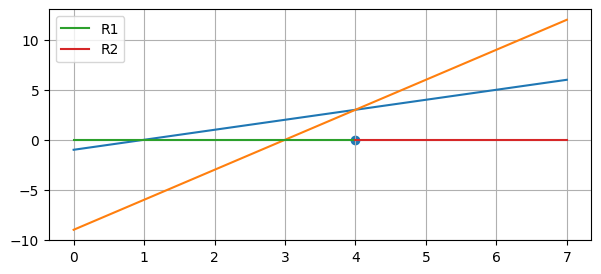

In [4]:
import numpy as np; import matplotlib.pyplot as plt
g1 = lambda x: x-1; g2 = lambda x: 3*x-9; x = np.linspace(0, 7, 2)
plt.figure(figsize=(7, 3)); plt.grid(); plt.plot(x, g1(x), x, g2(x)); plt.scatter(4, 0)
plt.plot((0, 4), (0, 0), label="R1"); plt.plot((4, 7), (0, 0), label="R2"); plt.legend();